In [31]:

import pandas as pd
file_path = 'job_market.csv'  
df = pd.read_csv(file_path)
df.head()


,Job Title,Location,Salary,Monthly Salary,Locality,City,State
0,Robotics / STEM Trainer,"Indore, Madhya Pradesh","₹1,80,000 - ₹3,60,000 a year",270000.0,NaN,Indore,Madhya Pradesh
1,HTML Developers - Freshers,"Banaswadi, Bengaluru, Karnataka",Not specified,NaN,Banaswadi,Bengaluru,Karnataka
2,Java Developers - Freshers,"Banaswadi, Bengaluru, Karnataka",Not specified,NaN,Banaswadi,Bengaluru,Karnataka
3,"Teachers - Pre-Primary and Primary (English, M...","Pulivendla, Andhra Pradesh","₹20,000 - ₹30,000 a month",25000.0,NaN,Pulivendla,Andhra Pradesh
4,College Student,Remote,"₹15,000 - ₹20,000 a month",17500.0,Remote,Remote,Remote


In [32]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       835 non-null    object 
 1   Location        835 non-null    object 
 2   Salary          835 non-null    object 
 3   Monthly Salary  497 non-null    float64
 4   Locality        254 non-null    object 
 5   City            835 non-null    object 
 6   State           835 non-null    object 
dtypes: float64(1), object(6)
memory usage: 45.8+ KB


Job Title           0
Location            0
Salary              0
Monthly Salary    338
Locality          581
City                0
State               0
dtype: int64

In [33]:
def clean_salary(salary):
    salary = re.sub(r'₹|,|a year|per month|per annum|lakh|crore', '', salary)  
    salary = salary.strip()
    
  
    salary_range = re.findall(r'\d+', salary)
    if len(salary_range) == 2:
        
        return (float(salary_range[0]) + float(salary_range[1])) / 2
    elif len(salary_range) == 1:
        
        return float(salary_range[0])
    else:
        return np.nan  

df['Salary'] = df['Salary'].apply(lambda x: clean_salary(str(x)))
print(df['Salary'].head(20))


0     270000.0
1          NaN
2          NaN
3      25000.0
4      17500.0
5          NaN
6          NaN
7          NaN
8      18683.5
9      12800.0
10     18500.0
11     17500.0
12     45000.0
13    450000.0
14     20000.0
15    500000.0
16     32500.0
17     13500.0
18     15250.0
19         NaN
Name: Salary, dtype: float64


In [34]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
print(df['Salary'].isnull().sum()) 


0


In [35]:
df['Salary'].describe()  


count    8.350000e+02
mean     4.832928e+04
std      1.187625e+05
min      9.000000e+00
25%      1.600000e+04
50%      1.850000e+04
75%      2.187500e+04
max      2.000000e+06
Name: Salary, dtype: float64

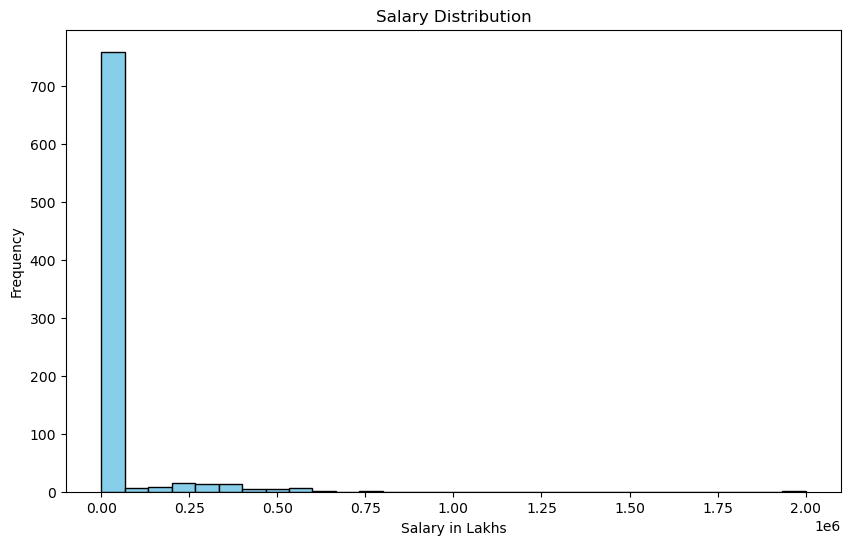

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['Salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary in Lakhs')
plt.ylabel('Frequency')
plt.show()


In [38]:
print(df['Salary'].isnull().sum()) 
print(df['Salary'].describe())


0
count    8.350000e+02
mean     4.832928e+04
std      1.187625e+05
min      9.000000e+00
25%      1.600000e+04
50%      1.850000e+04
75%      2.187500e+04
max      2.000000e+06
Name: Salary, dtype: float64


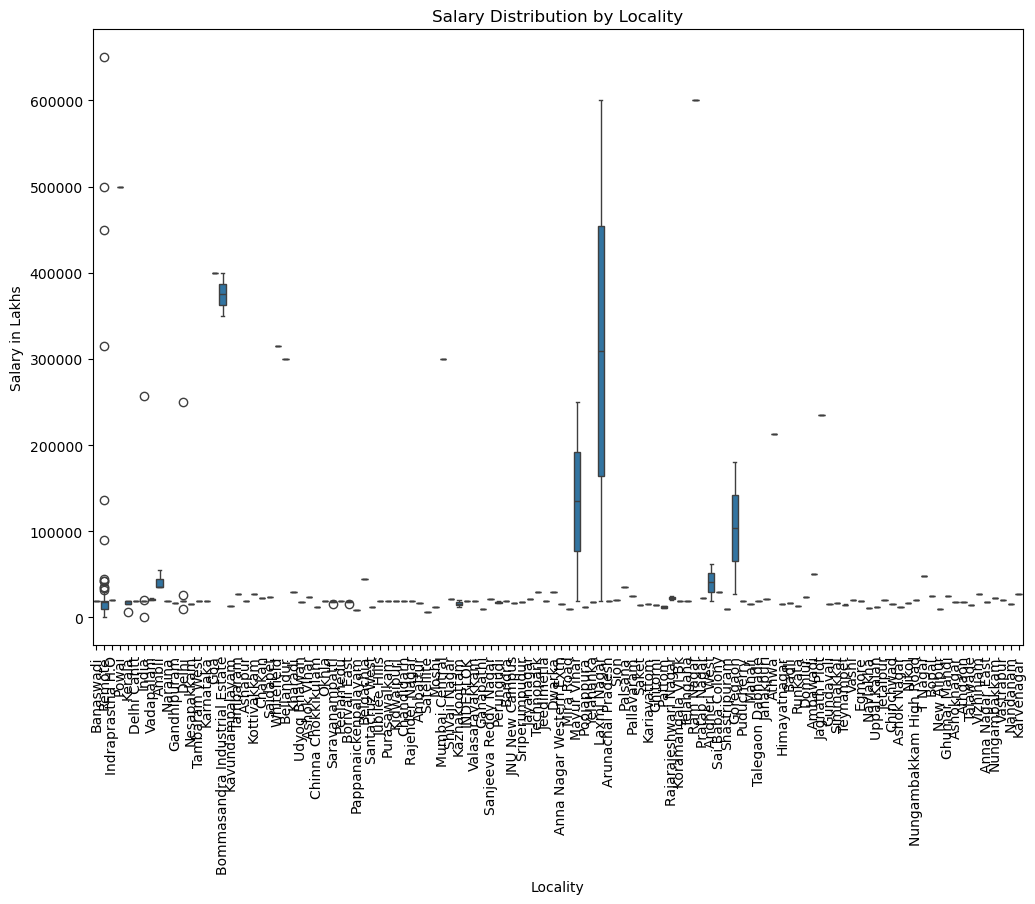

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Locality', y='Salary')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Locality')
plt.xlabel('Locality')
plt.ylabel('Salary in Lakhs')
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df_encoded = pd.get_dummies(df, drop_first=True)


X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 538157710.8301871


In [41]:

df_clean = df.dropna()
X = df_clean.drop('Salary', axis=1)
y = df_clean['Salary']


In [44]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)


model.fit(X_train_imputed, y_train)


y_pred = model.predict(X_test_imputed)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 559541514.9495444


In [43]:
from sklearn.ensemble import HistGradientBoostingRegressor


model = HistGradientBoostingRegressor(max_iter=100)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1163880162.3886151
